In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_image_data = pd.read_csv('features.csv')

X = train_image_data.iloc[:, 1:-1]#except the last and the first(Id)
y = train_image_data ['Pawpularity']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Without outliers
# Filter out samples where 'Pawpularity' is not equal to 1
#filtered_data = X_train[y_train!= 1]
#filtered_data.head()
#X_train=filtered_data
#y_train=y_train[y_train!=1]


linear model

Selected Features: Index(['haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4',
       'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9',
       'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red',
       'mean_green', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103',
       'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_90', 'hog_41', 'hog_99',
       'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19'],
      dtype='object')
Coefficients: [ 1.39015009e-01  5.81293905e+07 -5.07507343e-02 -2.32517562e+08
 -3.07754981e-02 -1.69323415e-03  5.81293905e+07  5.87673958e-04
  2.58868250e-02  1.00411955e+02 -2.51102905e-02  1.49797667e-02
  1.18339654e+00 -2.39999939e-02  8.71772424e-04  2.59513722e-03
 -1.87482527e-02 -3.67879004e-02  7.79069653e-02 -2.77166158e-02
 -2.57176536e-02 -5.04238917e-02 -2.16547456e-02 -3.12743724e-02
 -4.47360966e-03  1.00200739e-01 -2.84364101e-02  4.61826297e-02
  1.73291952e-02 -5.78474429e-02

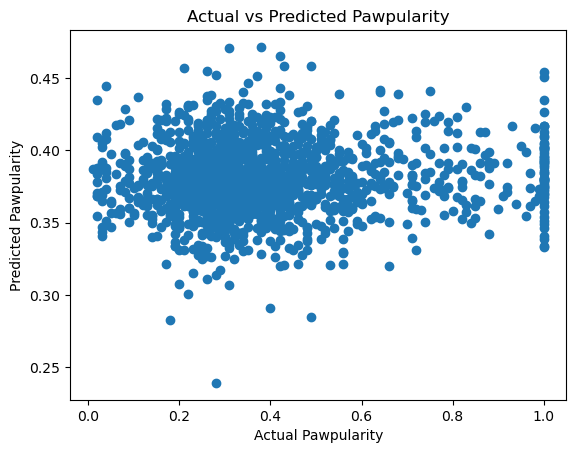

In [51]:
from sklearn.feature_selection import RFE

# Train the model
model = LinearRegression()

# RFE model
rfe=RFE(model,n_features_to_select=35)
x_rfe=rfe.fit_transform(X_train,y_train)

# Selected features
selected_features = X.columns[rfe.support_]
model.fit(X_train[selected_features], y_train)

# Make predictions
y_pred = model.predict(X_val[selected_features])

# Metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {model.coef_}")
print('Root Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()


test with linear model best model all features(43)

In [52]:

# Selecting the same features that were selected in the training set
X_test_selected = X_test[selected_features]

# Predictions on the test set
y_test_pred = model.predict(X_test_selected)

# Plot the predictions against the actual values
print('Root Mean squared error: %.7f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination on test set: %.5f' % r2_score(y_test, y_test_pred))


Root Mean squared error: 0.2094889
Coefficient of determination on test set: 0.00719


svr

In [53]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


svr_model = SVR()

# Create StandardScaler
scaler = StandardScaler()

# Scale the features
X_train_scaled = scaler.fit_transform(X_train)

# Define the parameter grid
param_grid = {'C': [0.001, 0.01,0.1, 1, 10], 'gamma': [1, 0.1, 10, 0.01,0.0001], 'kernel': ['rbf','linear' ]}

# Perform grid search on scaled data
grid = GridSearchCV(svr_model, param_grid, cv=5, verbose=3)
grid.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.009 total time=   1.5s
[CV 2/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.005 total time=   1.4s
[CV 3/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.013 total time=   1.3s
[CV 4/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.002 total time=   1.4s
[CV 5/5] END .....C=0.001, gamma=1, kernel=rbf;, score=-0.021 total time=   1.4s
[CV 1/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.008 total time=   0.7s
[CV 2/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.006 total time=   0.7s
[CV 3/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.013 total time=   0.6s
[CV 4/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.003 total time=   0.7s
[CV 5/5] END ..C=0.001, gamma=1, kernel=linear;, score=-0.021 total time=   0.7s
[CV 1/5] END ...C=0.001, gamma=0.1, kernel=rbf;, score=-0.012 total time=   1.6s
[CV 2/5] END ...C=0.001, gamma=0.1, kernel=rbf;

In [54]:
best_params, best_estimator

({'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}, SVR(C=0.1, gamma=10))

In [55]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Get the model performance metrics
print('Root Mean squared error: %.7f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.7f' % r2_score(y_val, y_pred))


c:\Users\Leonor Moura\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Root Mean squared error: 0.2132321
Coefficient of determination: -0.0025324


test with svr best 

In [56]:
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_test_pred = best_estimator.predict(X_test_scaled)

# Plot the predictions against the actual values
print('Root mean squared error on test set: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination on test set: %.5f' % r2_score(y_test, y_test_pred))

Root mean squared error on test set: 0.21066
Coefficient of determination on test set: -0.00394


decison tree grid

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [2, 4, 6, 8, 10]}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=3)
grid.fit(X_train, y_train)

# Best parameters
best_params_dt = grid.best_params_

# Best estimator
best_estimator_dt = grid.best_estimator_

best_params_dt, best_estimator_dt

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.017 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.019 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.001 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2;, score=-0.004 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.006 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.017 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.019 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4;, score=-0.001 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples

({'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 4},
 DecisionTreeRegressor(max_depth=2, min_samples_leaf=8, min_samples_split=4))

In [37]:
# Make predictions
y_pred = best_estimator.predict(X_val)

# Plot the predictions against the actual values
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

c:\Users\Leonor Moura\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Mean squared error: 0.21340
Coefficient of determination: -0.00416


test with decison tree

In [38]:
# Make predictions
y_test_pred = best_estimator.predict(X_test)

# Plot the predictions against the actual values
print('Mean squared error on test set: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination on test set: %.5f' % r2_score(y_test, y_test_pred))

c:\Users\Leonor Moura\miniconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Mean squared error on test set: 0.21039
Coefficient of determination on test set: -0.00137
